In [2]:
# Link parameters
a1 = 1
a2 = 0
a3 = sy.sqrt(2)

alpha1 = 0
alpha2 = sy.pi/4
alpha3 = 0


In [3]:
# Joint parameters

theta1 = sy.Symbol(r'\theta_1')
theta2 = sy.Symbol(r'\theta_2')
theta3 = sy.Symbol(r'\theta_3')
theta4 = sy.Symbol(r'\theta_4')

d1 = 0
d2 = 0
d3 = sy.sqrt(2)
d4 = 0


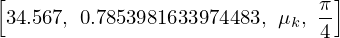

In [4]:
temp1 = 34.567
temp2 = np.pi/4
temp3 = sy.Symbol(r'\mu_k')
temp4 = sy.pi/4
[temp1, temp2, temp3, temp4]

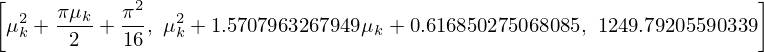

In [5]:
temp5 = sy.expand((temp3+temp4)**2)
temp6 = sy.expand((temp3+temp2)**2)
temp7 = sy.expand((temp1+temp2)**2)
[temp5, temp6, temp7]

In [6]:
# transformation from of i' frame with respect to i frame

def link_transform(a_i, alpha_i):
    Link_T = sy.Matrix([[1, 0, 0, a_i], [0, sy.cos(alpha_i), -sy.sin(alpha_i), 0], [0, sy.sin(alpha_i), sy.cos(alpha_i), 0], \
                   [0,0,0,1] ])
    return Link_T

In [7]:
# transformation of i frame with respect to (i-1)' frame'
def joint_transform(d_i, theta_i):
    Joint_T = sy.Matrix([[sy.cos(theta_i),  -sy.sin(theta_i), 0, 0], 
                        [sy.sin(theta_i),  sy.cos(theta_i), 0, 0], 
                        [0, 0, 1, d_i],
                        [0,0,0,1] ])
    return Joint_T


In [8]:
# Computation of transformation matricies of different link frames with respect to the ground frame
T_0 = sy.Identity(4)
T_0_1 = joint_transform(d1, theta1)


T_1_2 = sy.trigsimp( link_transform(a1, alpha1)*joint_transform(d2, theta2) )
T_0_2 = sy.trigsimp( T_0_1* T_1_2); 

T_2_3 = sy.trigsimp(link_transform(a2, alpha2)*joint_transform(d3, theta3) )
T_0_3 = sy.trigsimp( T_0_2* T_2_3); 

T_3_4 = sy.trigsimp(link_transform(a3, alpha3)*joint_transform(d4, theta4) )
T_0_4 = sy.trigsimp( T_0_3* T_3_4); 


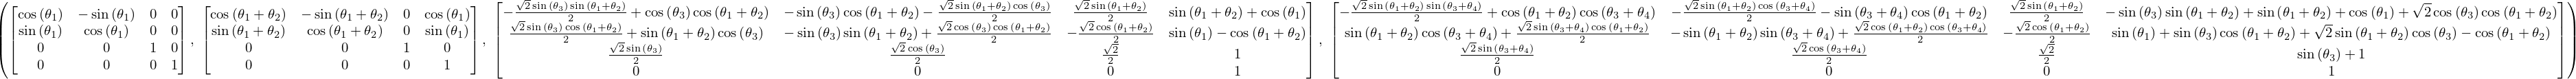

In [9]:
T_0_1, T_0_2, T_0_3, T_0_4 # Transformation matricies of first, second, third and fourth bodies

In [10]:
T_0_4[2,3]   # (3,4)th element of trnasformation matrix for 4 frame

In [11]:
# Extraction of Rotation matrices
R_0_1= T_0_1[0:3,0:3]
R_1_2= T_1_2[0:3,0:3]
R_2_3= T_2_3[0:3,0:3]
R_3_4= T_3_4[0:3,0:3]

r_0_1=T_0_1[0:3,3]
r_1_2=T_1_2[0:3,3]
r_2_3=T_2_3[0:3,3]
r_3_4=T_3_4[0:3,3]


In [12]:
 def cross_product(a,b):
        c=sy.Matrix([
            [a[1,0]*b[2,0]-a[2,0]*b[1,0]],
            [a[2,0]*b[0,0]-a[0,0]*b[2,0]],
            [a[0,0]*b[1,0]-a[1,0]*b[0,0]]
            ])
        return c

In [13]:
m=sy.Matrix([[0],[0],[1]])
n=sy.Matrix([[1],[0],[0]])
p = cross_product(m,n)
p

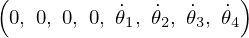

In [14]:
d_d1=0
d_d2=0
d_d3=0
d_d4=0
 
d_theta1 = sy.Symbol(r'\dot{\theta}_1')
d_theta2 = sy.Symbol(r'\dot{\theta}_2')
d_theta3 = sy.Symbol(r'\dot{\theta}_3')
d_theta4 = sy.Symbol(r'\dot{\theta}_4')

d_d1, d_d2, d_d3, d_d4, d_theta1, d_theta2, d_theta3, d_theta4 

In [15]:
omega_0_0 = sy.Matrix([[0],[0],[0]])   
v_0_0 = sy.Matrix([[0],[0],[0]])   


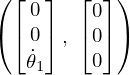

In [16]:
omega_1_1= R_0_1.T*(omega_0_0)+sy.Matrix([[0],[0],[d_theta1] ])

v_1_1 = R_0_1.T*(v_0_0 + cross_product(omega_0_0,r_0_1))+sy.Matrix([[0],[0],[d_d1] ])

omega_1_1, v_1_1

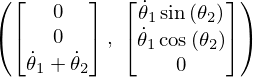

In [17]:
omega_2_2= R_1_2.T*(omega_1_1)+sy.Matrix([[0],[0],[d_theta2] ])

v_2_2 = R_1_2.T*(v_1_1 + cross_product(omega_1_1,r_1_2))+sy.Matrix([[0],[0],[d_d2] ])

omega_2_2, v_2_2

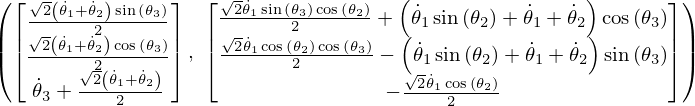

In [18]:
omega_3_3= R_2_3.T*(omega_2_2)+sy.Matrix([[0],[0],[d_theta3] ])

v_3_3 = R_2_3.T*(v_2_2 + cross_product(omega_2_2,r_2_3))+sy.Matrix([[0],[0],[d_d3] ])

omega_3_3, v_3_3

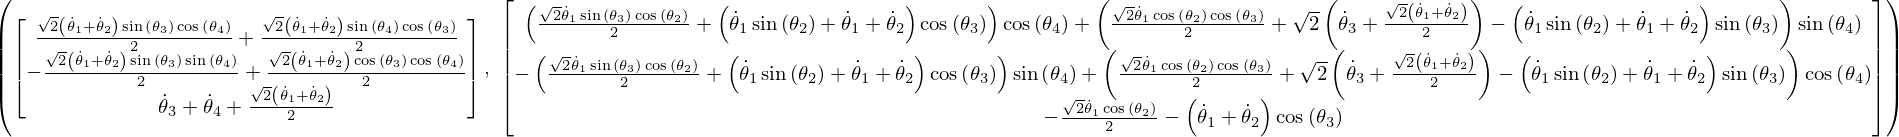

In [19]:
omega_4_4= R_3_4.T*(omega_3_3)+sy.Matrix([[0],[0],[d_theta4] ])

v_4_4 = R_3_4.T*(v_3_3 + cross_product(omega_3_3,r_3_4))+sy.Matrix([[0],[0],[d_d4] ])

omega_4_4, v_4_4

In [20]:
R_0_4= T_0_4[0:3,0:3]
v_0_4=sy.trigsimp(R_0_4*v_4_4)  
omega_0_4 = sy.trigsimp(R_0_4*omega_4_4)

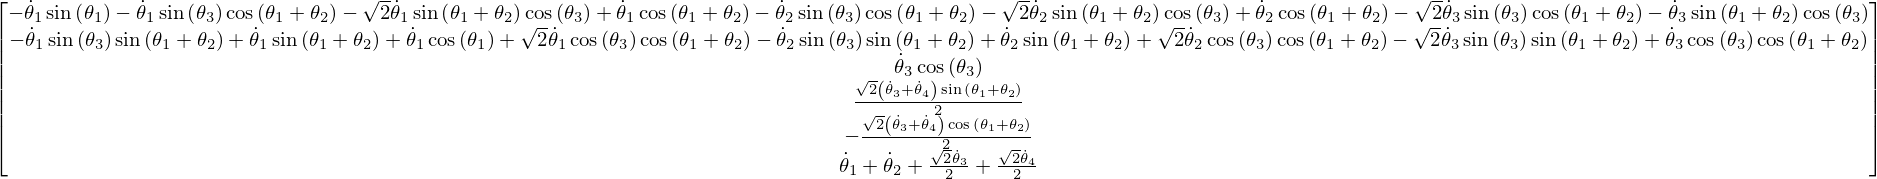

In [21]:
mu_0_4 = sy.Matrix([v_0_4, omega_0_4])
mu_0_4

In [22]:

a1= mu_0_4.subs([(d_theta1, 1), (d_theta2,0), (d_theta3, 0), (d_theta4,0)])
a2= mu_0_4.subs([(d_theta1, 0), (d_theta2,1), (d_theta3, 0), (d_theta4,0)])
a3= mu_0_4.subs([(d_theta1, 0), (d_theta2,0), (d_theta3, 1), (d_theta4,0)])
a4= mu_0_4.subs([(d_theta1, 0), (d_theta2,0), (d_theta3, 0), (d_theta4,1)])

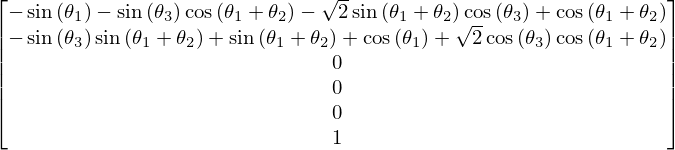

In [23]:
a1

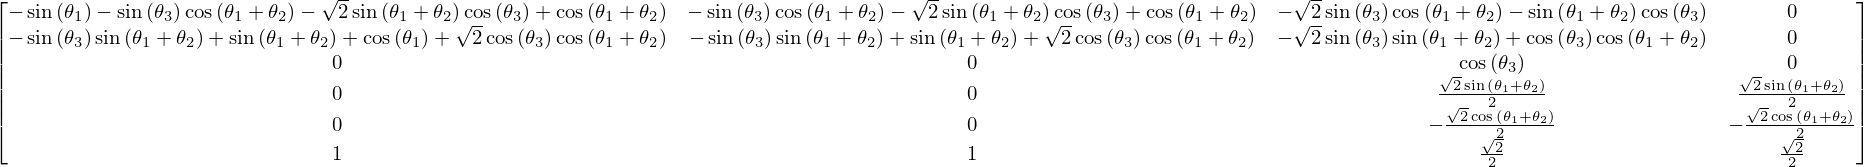

In [24]:
J=a1
J=J.col_insert(1,a2)
J=J.col_insert(2,a3)
J=J.col_insert(3,a4)
J

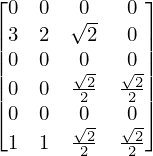

In [25]:
J_num_1 = J.subs([(theta1, 0), (theta2, sy.pi/2), (theta3, -sy.pi/2), (theta4,0)])
J_num_1

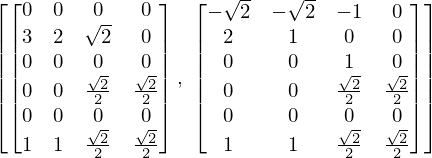

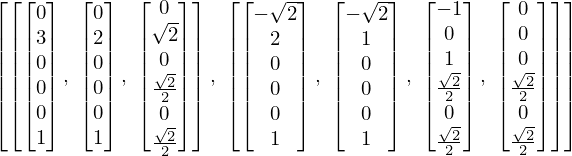

In [32]:
J_num_1 = J.subs([(theta1, 0), (theta2, sy.pi/2), (theta3, -sy.pi/2), (theta4,0)])
J_num_2 = J.subs([(theta1, 0), (theta2, sy.pi/2), (theta3, 0), (theta4,0)])
display([J_num_1, J_num_2])
display([J_num_1.columnspace(), J_num_2.columnspace()])